# Finding the Band Gap 

## Equations
Densidad Óptica
\begin{equation}
O.D = \frac{\alpha l}{ln(10)}
\end{equation}
K (numero de onda) 
\begin{equation}
k = \frac{\alpha \lambda}{4\pi}
\end{equation}
Transmitancia y Reflectancia
\begin{align}
T = (1-R)^{2} e^{-\alpha l}\\
R =  1 -e^{\frac{1}{2}\alpha l}T^{\frac{1}{2}}
\end{align}


In [285]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Variables

Importación de datos

In [286]:
class material:
            
    def __init__(self, name,l,refraction_coefficient):
        data = pd.read_excel('datos_tecnicas.xlsx')
        c1 = 100000000
        c2 = 100000000000
        self.name = name
        self.l = l
        self.refraction_coefficient = refraction_coefficient
        self.wavelength = pd.to_numeric(data["Wavelength"], errors='coerce')
        transmitancia = pd.to_numeric(data[f'{self.name}_T']/c1, errors='coerce')
        absorbancia =  pd.to_numeric(data[f'{self.name}_Abs']/c2, errors='coerce') 
        while(transmitancia[transmitancia < 20].size > 0):
            transmitancia[transmitancia < 20] = transmitancia[transmitancia <20]*10
        while(absorbancia[absorbancia < 0.02].size > 0):
             absorbancia[absorbancia < 0.02] = absorbancia[absorbancia <0.02]*10
        self.transmitancia = transmitancia
        self.absorbancia =absorbancia   
       
        
    def R_theoric_calc(self):
        '''
        Calcula la transmitancia con  R = 1 - e**(0.5*self.absorbancia*l)*transmitancia
        '''
        size = self.absorbancia.size
        R = np.empty(size, dtype=float)
        R = (1 - np.abs(np.power(np.e,0.5*self.absorbancia*self.l)*np.sqrt(self.transmitancia)))*10
        return R
    def k_calc(self):
        '''
        Calcula el numero de onda  como k = (alpha*lambda)/4pi
        devuelve un dataframe de pandas
        '''
        size = self.absorbancia.size
        k = np.empty(size, dtype=float)
        k = np.multiply(self.absorbancia,self.wavelength)*(1/(4*np.pi))#Numero de onda
        return k 
    def do_calc(self):
        '''
        Calcula la densidad optica  como  d.o = (absorbancia*self.l)/(np.log(10))#Espesor del material
        devuelve un dataframe de pandas
        '''
        size = self.absorbancia.size
        do = np.empty(size, dtype=float)
        do = 0.434*(self.absorbancia*self.l)#Espesor del material
        return do

    def graph_abs(self):
            '''
            Gráfica la  la longitud de onda vs  absorbancia
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,self.absorbancia,label=self.name,s=3, color='darkgoldenrod')
            plt.xlabel("longitud de onda (nm)")
            plt.ylabel("Absorbancia")
            plt.title("Absorbancia del "+self.name)
            plt.legend()
            plt.show()

    def graph_T(self):
            '''
            Gráfica la  la longitud de onda vs la transmitancia 
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,self.transmitancia,label=self.name,s=3, color='orange')
            plt.xlabel("longitud de onda (nm)")
            plt.ylabel("Transmitancia")
            plt.title("Transmitancia del "+self.name)
            plt.legend()
            plt.show()   
    def multiple_graph_absT(self, reflectancia):
            '''
            Gráfica la longitud de onda vs la transmitancia y reflectancia.
            Usa un eje Y secundario para la reflectancia debido a escalas diferentes.
            '''
            plt.style.use('Solarize_Light2')
            
            # 1. Crear la figura y el primer eje (para transmitancia)
            fig, ax1 = plt.subplots(figsize=(10, 5))

            # 2. Configurar el primer eje (ax1) para Transmitancia
            color_t = 'orange'
            ax1.set_xlabel("longitud de onda (nm)")
            ax1.set_ylabel("Transmitancia (%)", color=color_t)  # Etiqueta para el eje 1
            ax1.scatter(self.wavelength, self.transmitancia, label="Transmitancia", s=4,color=color_t)
            #ax1.tick_params(axis='y', labelcolor=color_t) # Color de las marcas del eje 1

            # 3. Crear el segundo eje (ax2) que comparte el eje x
            ax2 = ax1.twinx()
            color_r = 'teal'
            ax2.set_ylabel("Reflectancia (R)", color=color_r)  # Etiqueta para el eje 2
            ax2.scatter(self.wavelength, reflectancia, label="Reflectancia", s=4,color=color_r)
            #ax2.tick_params(axis='y', labelcolor=color_r) # Color de las marcas del eje 2

            # 4. Título
            plt.title("Comparación P. ópticas del " + self.name)

            # 5. Crear una leyenda combinada para ambos ejes
            # Obtenemos los "handles" (marcadores) y "labels" de cada eje
            handles1, labels1 = ax1.get_legend_handles_labels()
            handles2, labels2 = ax2.get_legend_handles_labels()
            
            # Los combinamos en una sola leyenda
            ax1.legend(handles1 + handles2, labels1 + labels2, loc='best')

            # Asegurar que todo se vea bien y no se superponga
            fig.tight_layout()  
            plt.show()
 
    def graph_R_Theoric(self,R):
            '''
            Gráfica la  la longitud de onda vs la transmitancia 
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,R,label=self.name,s=4, color='teal')
            plt.xlabel("Wavelength")
            plt.ylabel("Reflectancia Teorica")
            plt.title("Reflectancia teorica de "+self.name)
            plt.legend()
            plt.show()
    def graph_do(self,k,do):
            '''
            Gráfica de la absorbancia vs densidad optica 
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(k,do,label=self.name,s=4, color='gold')
            plt.xlabel("absorbancia")
            plt.ylabel("densidad optica")
            plt.title("densidad optica del "+self.name)
            plt.legend()
            plt.show()
    def graph_k(self,k):  
            '''
            Gráfica la longitud de onda vs el numero de onda k
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,k,label=self.name,s=4, color='lightseagreen')
            plt.xlabel("numero de onda")
            plt.ylabel("K")
            plt.title("Numero de onda del "+self.name)
            plt.legend()
            plt.show()
       

    

In [287]:
vidrio =  material("Vidrio",0.98,1.5)#0.98 mm
acetato = material("Acetato",0.1,1.3720)#0.1mm
cristal = material("Cristal",0.2,1.5)#0.2 mm

In [288]:
print(np.max(vidrio.transmitancia))
print(np.min(vidrio.transmitancia))
print(vidrio.transmitancia)

90.10939026
80.15912628
0       88.654037
1       88.661697
2       88.664009
3       88.668564
4       88.681381
          ...    
2146    82.951179
2147    82.341461
2148    81.658882
2149    80.971245
2150    80.159126
Name: Vidrio_T, Length: 2151, dtype: float64


In [289]:
print(np.max(vidrio.absorbancia))
print(np.min(vidrio.absorbancia))
print(vidrio.absorbancia)


0.09618147463
0.04498948157
0       0.051873
1       0.051829
2       0.051789
3       0.051762
4       0.051733
          ...   
2146    0.081468
2147    0.084508
2148    0.088224
2149    0.092187
2150    0.096181
Name: Vidrio_Abs, Length: 2151, dtype: float64


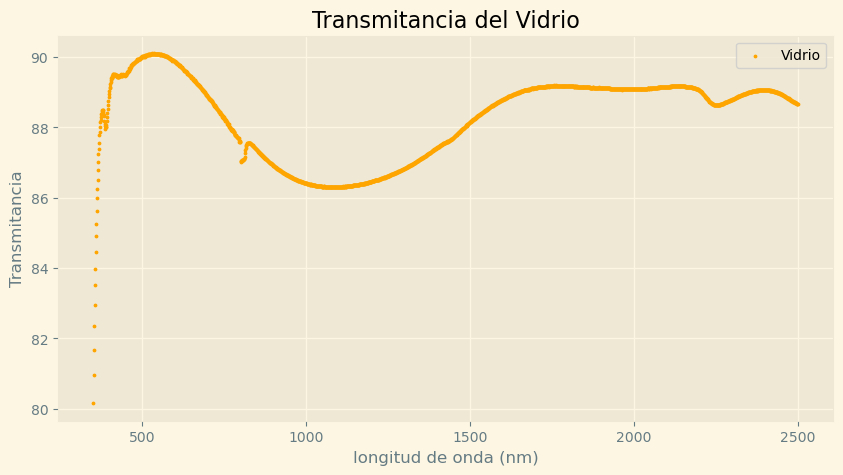

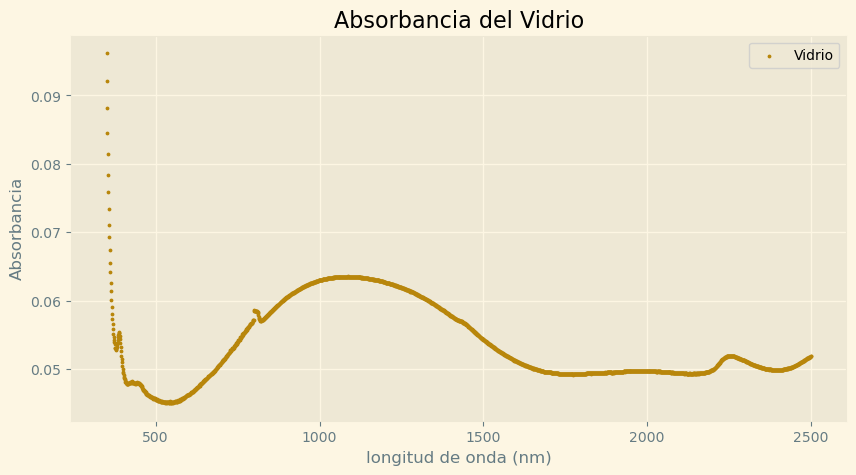

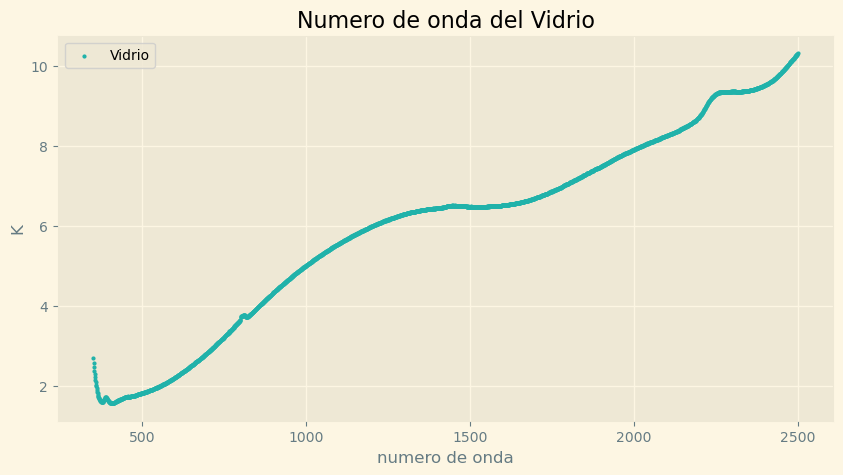

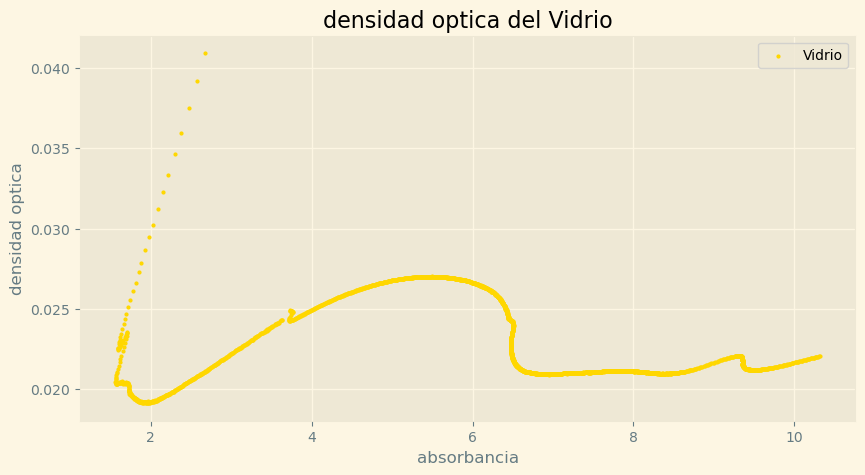

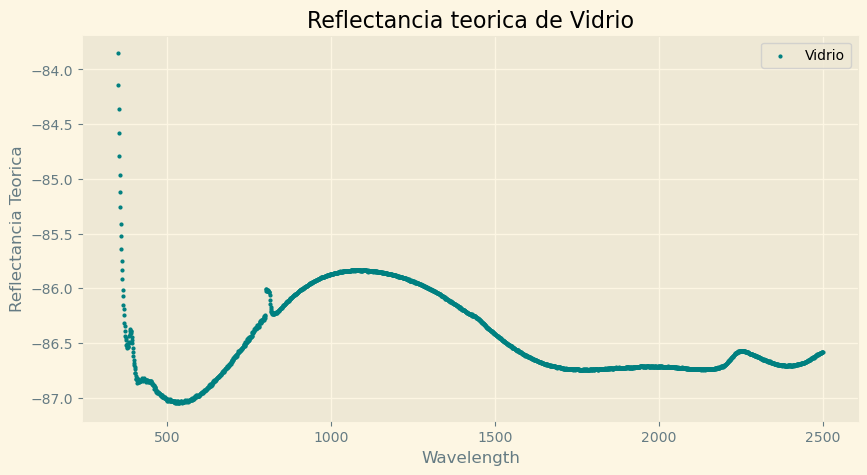

In [290]:
k_vidrio=vidrio.k_calc()
r_teorica_vidrio = vidrio.R_theoric_calc()
vidrio.graph_T()
vidrio.graph_abs()
vidrio.graph_k(k_vidrio)
vidrio.graph_do(k_vidrio,vidrio.do_calc())
vidrio.graph_R_Theoric(r_teorica_vidrio)

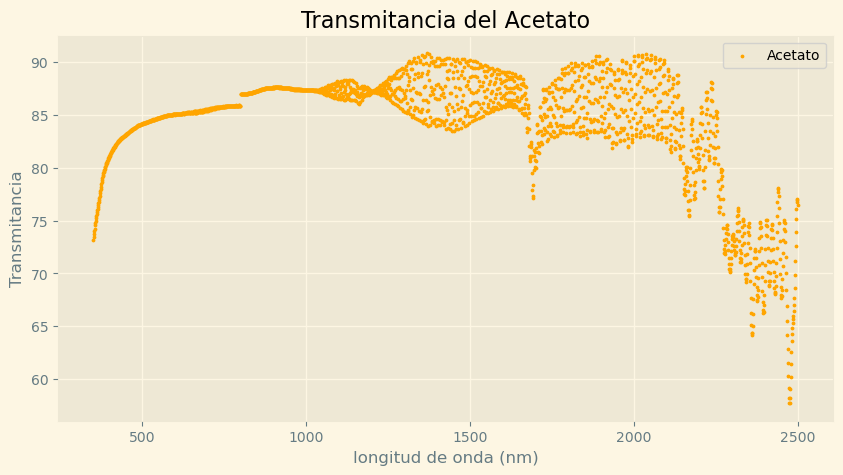

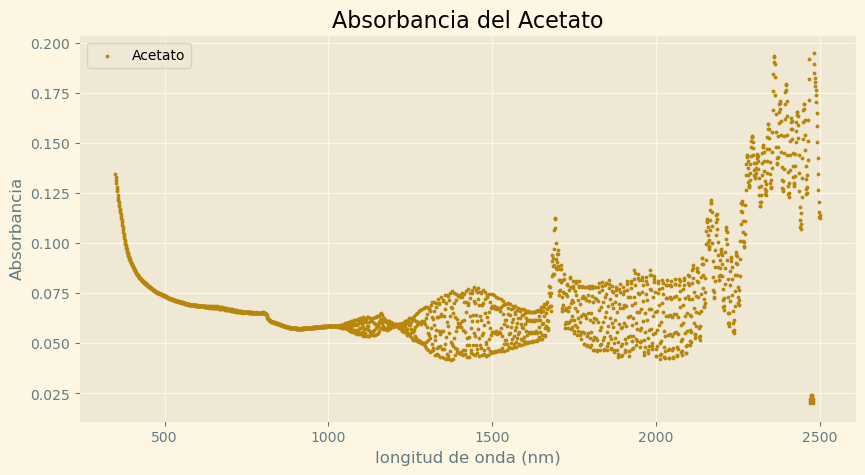

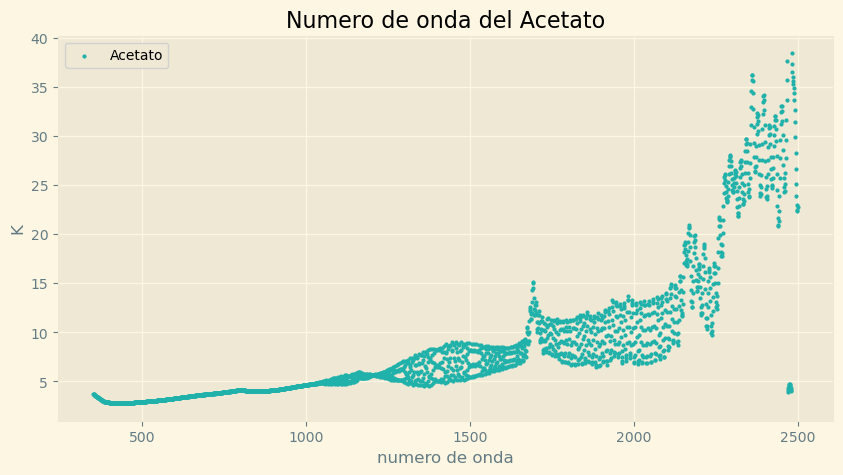

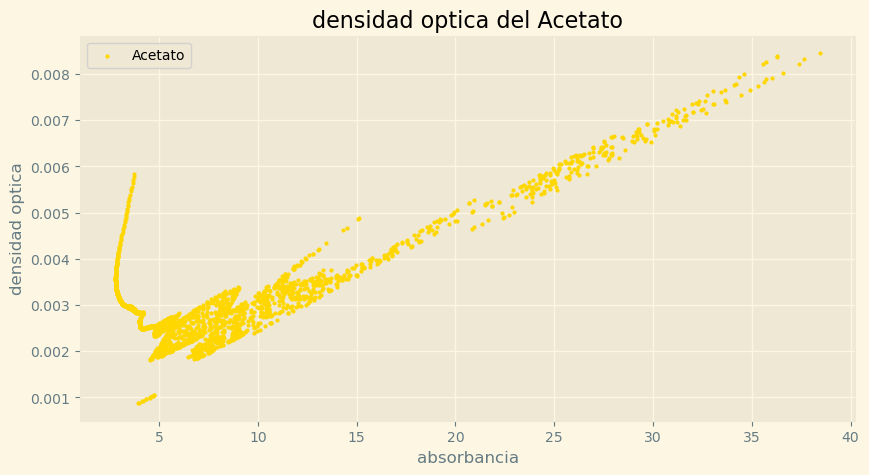

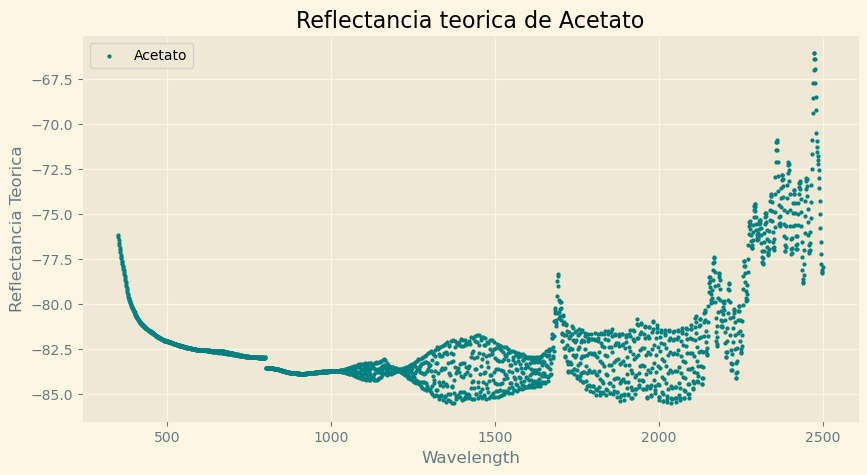

In [291]:
k_acetato=acetato.k_calc()
r_teorica_acetato = acetato.R_theoric_calc()
acetato.graph_T()
acetato.graph_abs()
acetato.graph_k(k_acetato)
acetato.graph_do(k_acetato,acetato.do_calc())
acetato.graph_R_Theoric(r_teorica_acetato)


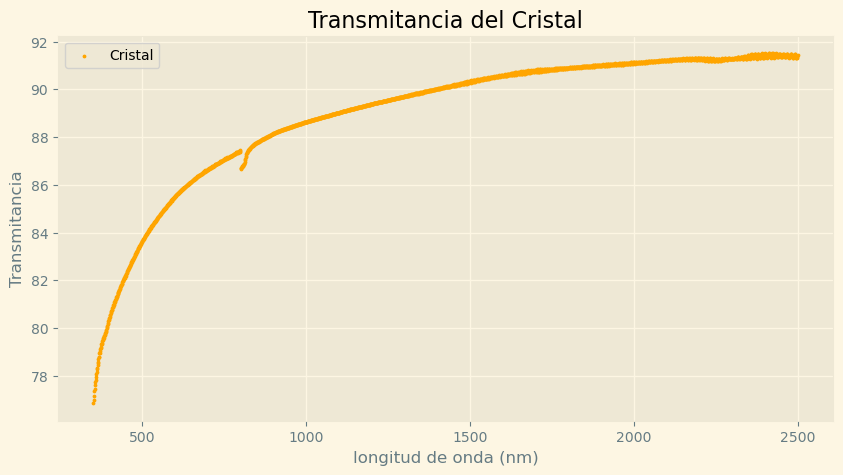

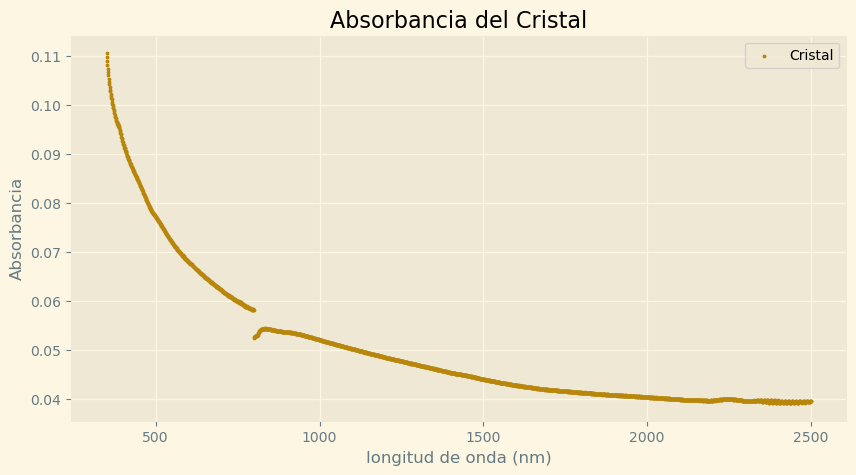

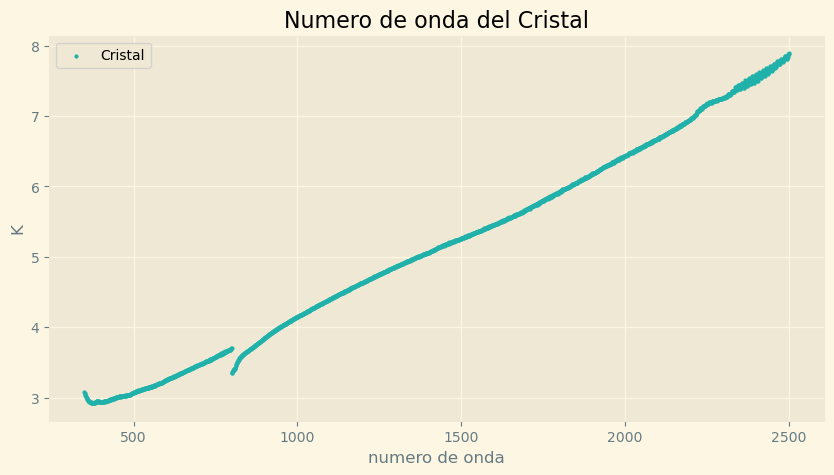

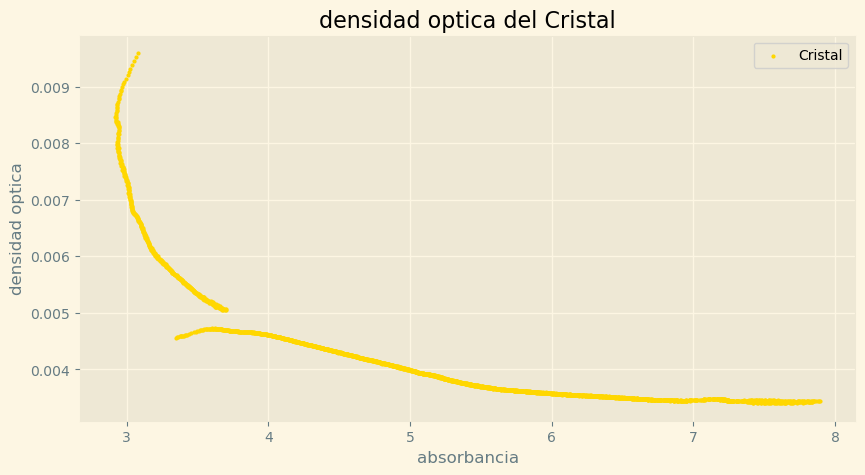

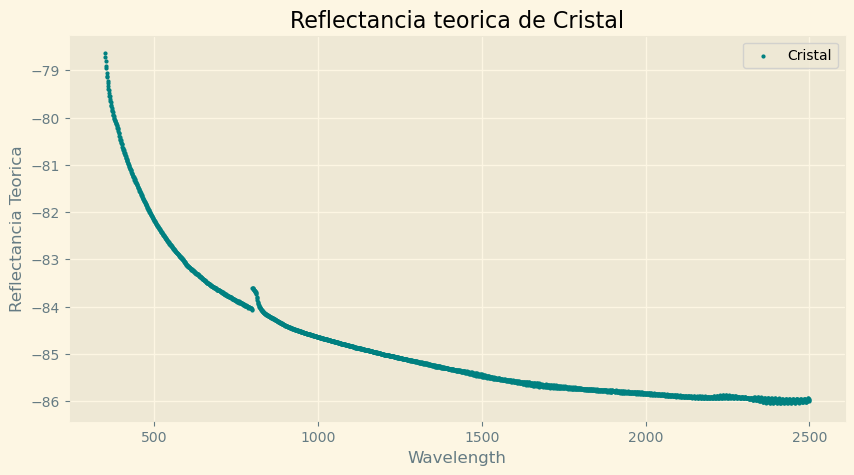

In [292]:
k_cristal=cristal.k_calc()
r_teorica_cristal = cristal.R_theoric_calc()
cristal.graph_T()
cristal.graph_abs()
cristal.graph_k(k_cristal)
cristal.graph_do(k_cristal,cristal.do_calc())
cristal.graph_R_Theoric(r_teorica_cristal)


## Gráficas Multiples

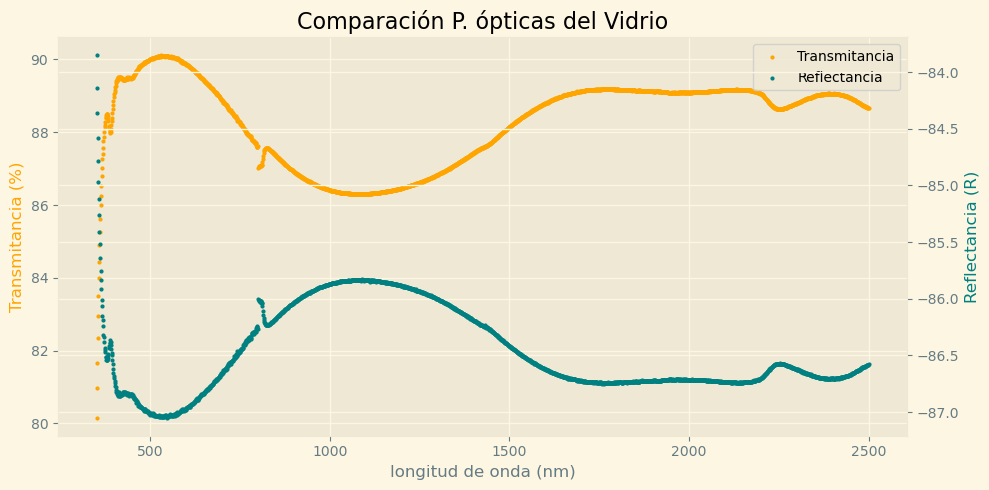

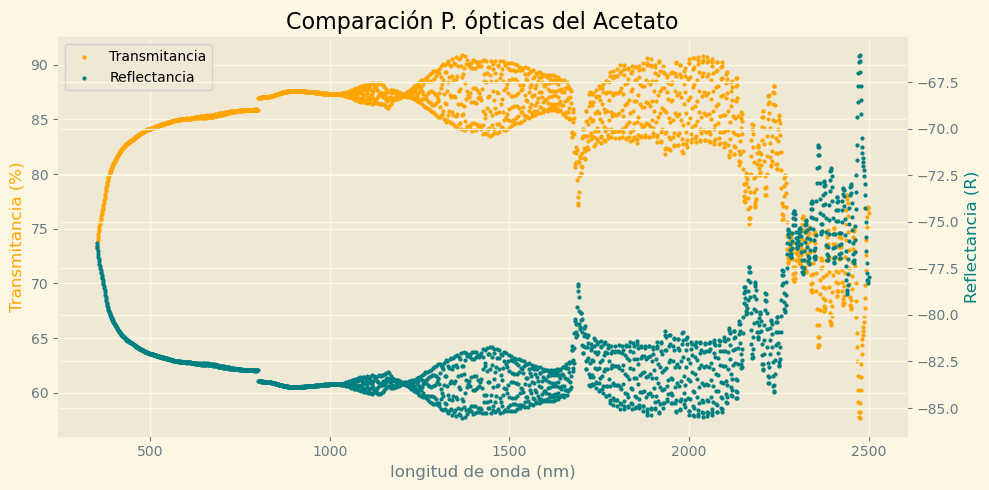

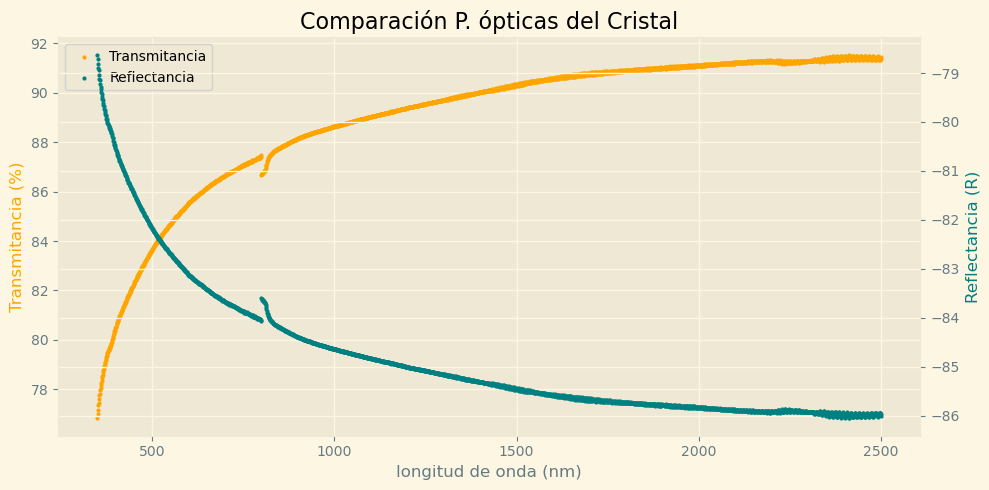

In [293]:
vidrio.multiple_graph_absT(r_teorica_vidrio)
acetato.multiple_graph_absT(r_teorica_acetato)
cristal.multiple_graph_absT(r_teorica_cristal)